In [38]:
# Import des librairies
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import re


df1 = pd.read_csv("dataset.csv")
df1

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [41]:
df1.info()
# Pas de valeurs de manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [42]:
df1.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [43]:
# Les différents types de CV ( 25 labels)
df1["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [44]:
# Affichage des CV
df1["Resume"]

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [49]:
# Nettoyage des CV
import re
import nltk
from nltk.stem import SnowballStemmer  
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
stemmer = SnowballStemmer(language = "english")

def traitement(text):
    text = str(text).lower() # Mise en miniscule des CV
    # Elimination de la ponctuation , des chiffres ...
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = re.sub(" \d+", " ", text) 
    text = re.sub(" #\d+", " ", text) 
    
    # Tokenization, Stemmization, STOPWORDS
    text = word_tokenize(text)
    text = ' '.join(word for word in text if word not in STOPWORDS) # delete stopwors from text
    text = stemmer.stem(text)
    return text
    


In [50]:
# Application de la fonction sur la colomne
df1["Resume"] = df1["Resume"].apply(traitement)

In [51]:
# Affichage de la nouvelle data
df1

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may may uitrgpvdata scientis...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
957,Testing,computer skills proficient ms office word basi...
958,Testing,willingness accept challenges positive thinkin...
959,Testing,personal skills quick learner eagerness learn ...
960,Testing,computer skills software knowledge mspower poi...


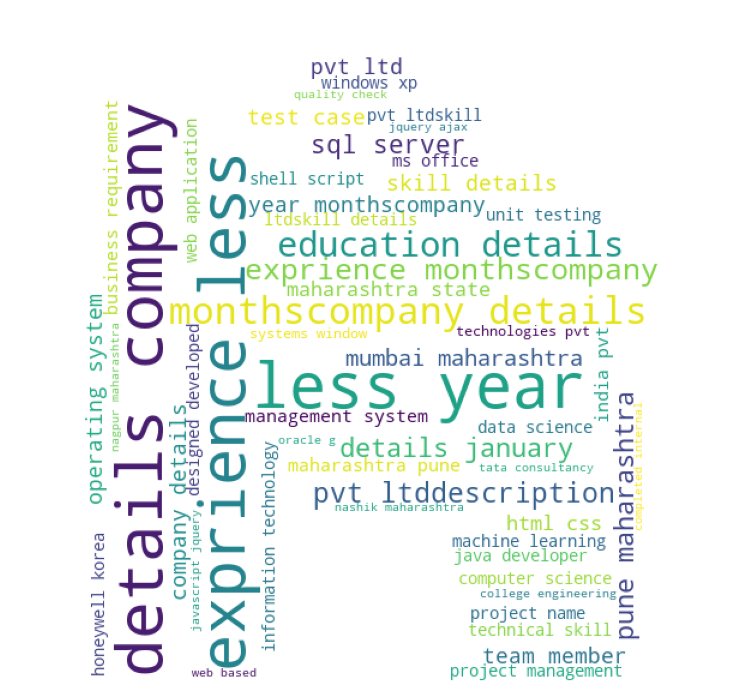

In [53]:
# Worcloud 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
import  numpy as np
from PIL import Image
import requests

comment_words = '' 
stopwords = set(STOPWORDS)
for val in df1.Resume: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
# Les mots "experience", "details company", "less year" semble les plus fréquents

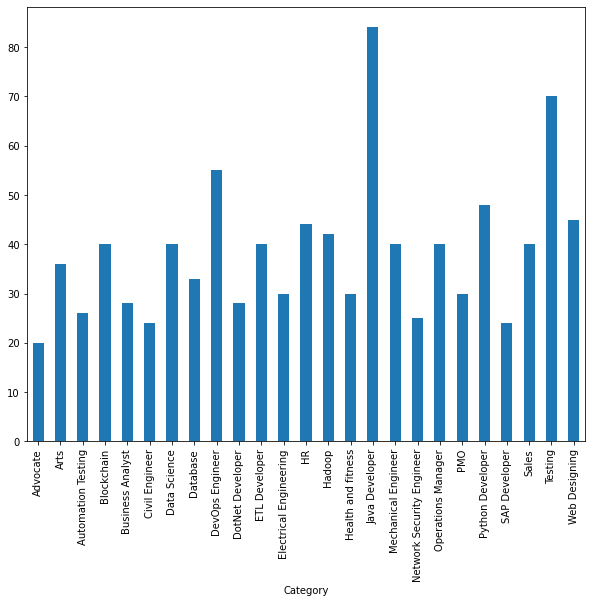

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
df1.groupby('Category').Resume.count().plot.bar(ylim=0)
plt.show()
# D'après ce graphique , les "Java Developper" arrivent en tête des CV 

In [55]:
# Vectorization des CV 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.Resume).toarray()
labels = df1.Category
features.shape

(962, 28171)

# Training

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [57]:
# Fractionnement du jeu de données
X = df1['Resume'] # Détermination du jeu de données
y = df1['Category'] # Détermination de la cible
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state = 0)


# Model Selection 

In [66]:
# Sélection de 4 classificateur : RandomForestClassifier , LinearSVC,  MultinomialNB
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
# Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.761658
1,RandomForestClassifier,1,0.849741
2,RandomForestClassifier,2,0.828125
3,RandomForestClassifier,3,0.770833
4,RandomForestClassifier,4,0.796875
5,LinearSVC,0,0.979275
6,LinearSVC,1,1.000000
7,LinearSVC,2,1.000000
8,LinearSVC,3,1.000000
9,LinearSVC,4,1.000000


# Evaluation

In [59]:
# On évalue les 4 algorythmes
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
acc = pd.concat([mean_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy']
acc
# LogisticRegression, LinearSVC semble être les plus performants

,Mean Accuracy
model_name,
LinearSVC,0.995855
LogisticRegression,0.995855
MultinomialNB,0.976106
RandomForestClassifier,0.801446


In [60]:
# On chosit LogisticRegression et on le réentraînene
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df1.index, test_size=0.25, 
                                                               random_state=1)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
# Test
y_pred = model.predict(X_test)

# Classification par rapport aux catégories
print('\t\t\tCLASSIFICATIION REPORT\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df1['Category'].unique()))

			CLASSIFICATIION REPORT

                           precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         5
                       HR       1.00      1.00      1.00        10
                 Advocate       1.00      1.00      1.00         7
                     Arts       1.00      1.00      1.00        16
            Web Designing       1.00      1.00      1.00         6
      Mechanical Engineer       1.00      1.00      1.00         8
                    Sales       1.00      1.00      1.00        11
       Health and fitness       1.00      1.00      1.00         7
           Civil Engineer       1.00      0.92      0.96        13
           Java Developer       1.00      1.00      1.00         5
         Business Analyst       1.00      1.00      1.00        10
            SAP Developer       1.00      1.00      1.00         8
       Automation Testing       1.00      1.00      1.00        11
   Electrical Engineering       1.

In [61]:
# Précision de la LogisticRegression
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.995850622406639


In [62]:
# Enregistrement du modèle
from joblib import dump
dump(model, 'cv_classifier.joblib')

['cv_classifier.joblib']

Text(0.5, 1.0, 'CONFUSION MATRIX - Logistic Regression\n')

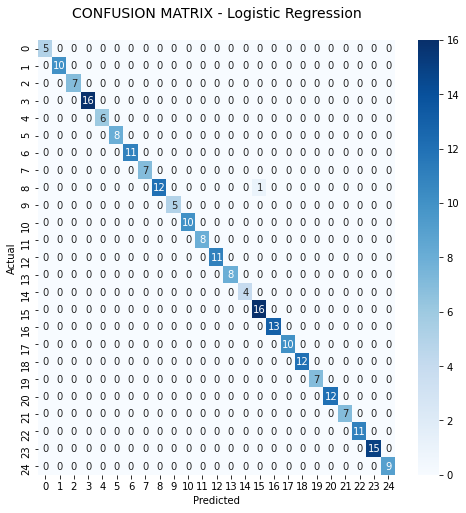

In [63]:
# Matrice de confusion
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Logistic Regression\n", size=14)
#On peut ainsi voir la précision des valeurs attendues et des valeurs prédictes

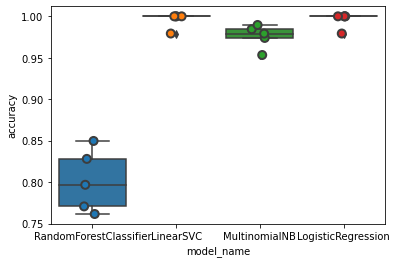

In [64]:
# Autre affichage de la précision des 4 algorythmes
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()